### **Potato Disease Classification**

In [12]:
# Import all the Dependencies
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [13]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [14]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\naveen.maurya\OneDrive - Aurum\Plant Village\PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [97]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [16]:
len(dataset)

68

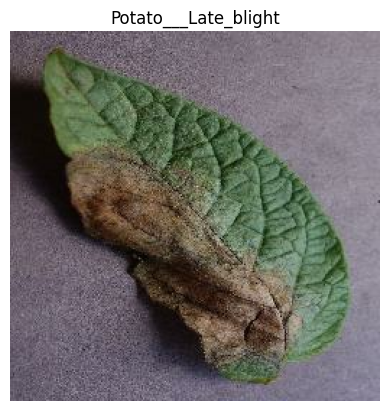

In [50]:
image_list=[]
for image_batch, labels_batch in dataset.take(1):
    x=image_batch[0].numpy()
    # image_list.append(x)
    plt.imshow(x.astype('uint8'))
    plt.title(class_names[labels_batch[0]])
    plt.axis("off")
    
    # print(labels_batch.numpy())

In [51]:
len(dataset)

68

In [52]:
train_ds = dataset.take(54)
len(train_ds)

54

In [53]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [54]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [55]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [56]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [57]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [58]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [59]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [124]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [125]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [126]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [127]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 96s 2s/step - loss: 0.8960 - accuracy: 0.4780 - val_loss: 0.8157 - val_accuracy: 0.4896
Epoch 2/50
54/54 [==============================] - 82s 2s/step - loss: 0.6361 - accuracy: 0.7130 - val_loss: 0.4839 - val_accuracy: 0.7917
Epoch 3/50
54/54 [==============================] - 83s 2s/step - loss: 0.3928 - accuracy: 0.8235 - val_loss: 0.4098 - val_accuracy: 0.8177
Epoch 4/50
54/54 [==============================] - 85s 2s/step - loss: 0.3166 - accuracy: 0.8721 - val_loss: 0.2274 - val_accuracy: 0.9115
Epoch 5/50
54/54 [==============================] - 88s 2s/step - loss: 0.1853 - accuracy: 0.9282 - val_loss: 0.5735 - val_accuracy: 0.8073
Epoch 6/50
54/54 [==============================] - 82s 2s/step - loss: 0.2463 - accuracy: 0.9068 - val_loss: 0.1834 - val_accuracy: 0.9167
Epoch 7/50
54/54 [==============================] - 85s 2s/step - loss: 0.1792 - accuracy: 0.9294 - val_loss: 0.2191 - val_accuracy: 0.9115
Epoch 8/50
54/54 [==

In [129]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 404ms/step - loss: 0.1633 - accuracy: 0.9526


first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 587ms/step
predicted label: Potato___Late_blight


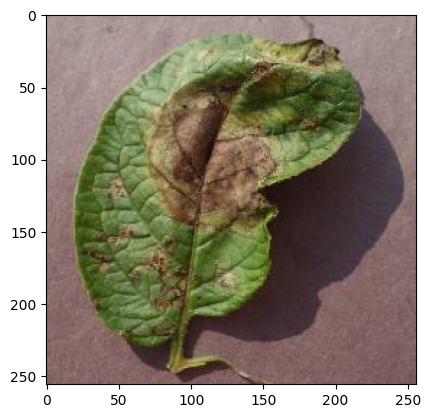

In [130]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [131]:
test_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [99]:
batch_prediction

array([[9.9763453e-01, 2.3650767e-03, 3.0411942e-07],
       [9.1136056e-01, 8.8475585e-02, 1.6399530e-04],
       [9.9900085e-01, 9.9911552e-04, 5.2867919e-09],
       [9.9895406e-01, 1.0459353e-03, 4.5067811e-08],
       [6.6356456e-01, 3.3643547e-01, 1.9229955e-10],
       [5.7922475e-02, 9.4207734e-01, 2.5365506e-07],
       [2.0297181e-02, 9.7969753e-01, 5.2131741e-06],
       [7.6806986e-01, 2.3188841e-01, 4.1638177e-05]], dtype=float32)

In [98]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [135]:
def predict(model, images):
    img_array = tf.keras.preprocessing.image.img_to_array(images)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [136]:
import os
from PIL import Image
# Define the folder path
folder_path = r'C:\Users\naveen.maurya\OneDrive - Aurum\Plant Village\PlantVillage\Potato___Early_blight'

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Filter out only image files (e.g., jpg, png)
image_files = [file for file in files ]

In [137]:
from tensorflow.keras.models import load_model
model_pretrain = load_model("Potato_disease_detection.h5")

In [138]:
image_files[0]
file_path = os.path.join(folder_path, image_files[0])
img=Image.open(file_path)


In [139]:
img_array=np.array(img)
img_array = tf.expand_dims(img_array, 0)

In [140]:
class_names[np.argmax(model_pretrain.predict(img_array))]

1/1 [==============================] - 0s 199ms/step


'Potato___Early_blight'

1/1 [==============================] - 0s 43ms/step


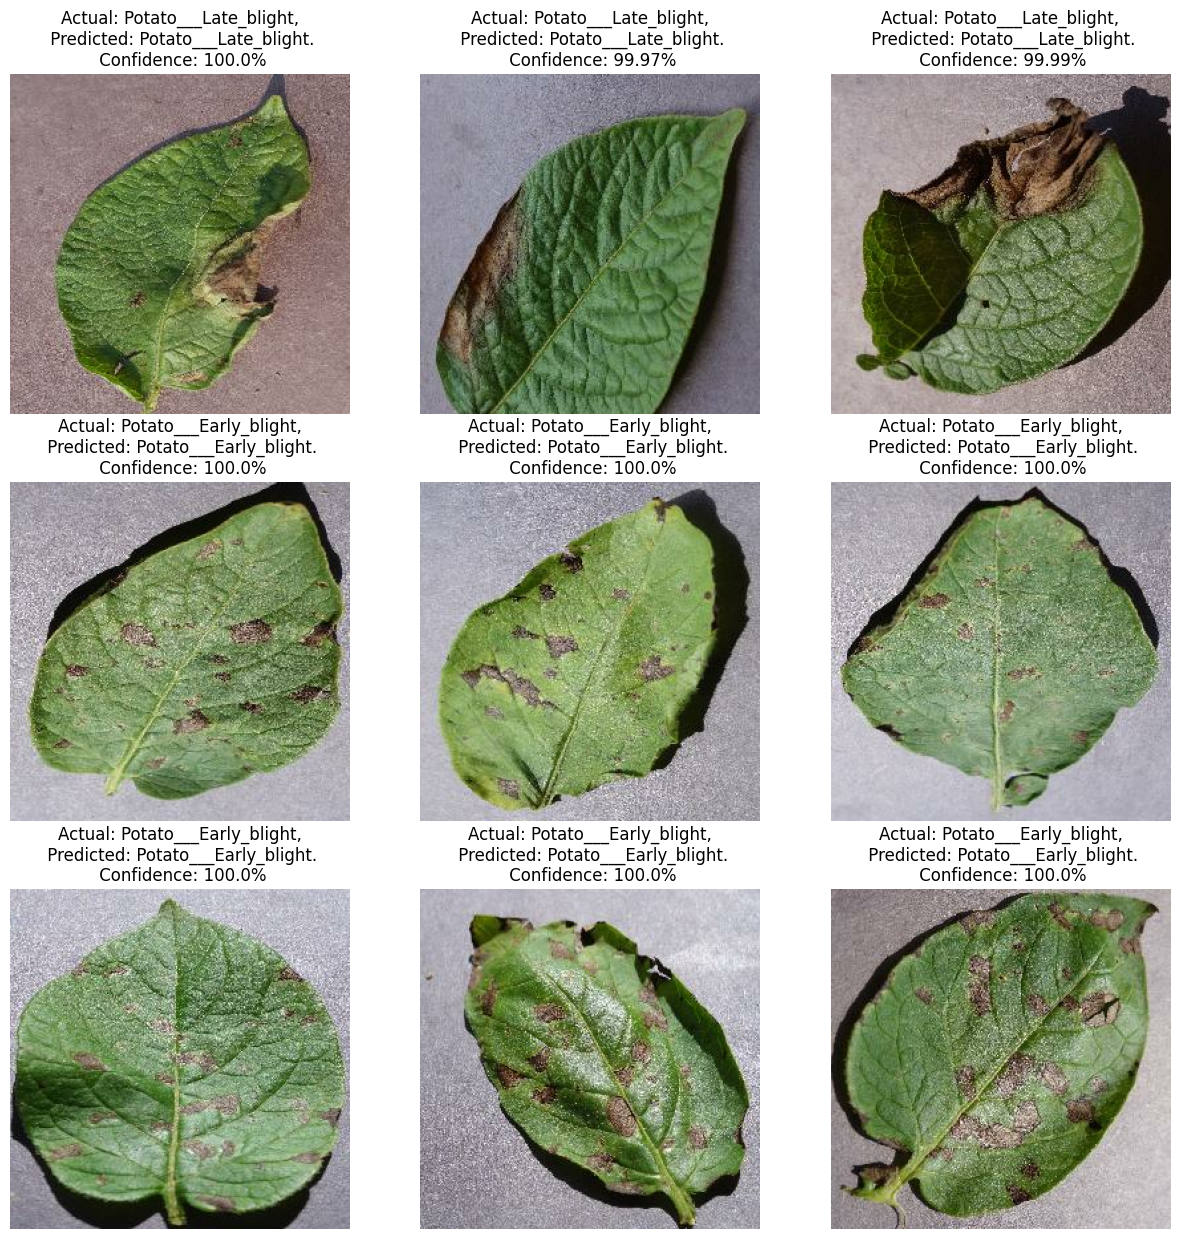

In [141]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [70]:
model.save(f"Potato_disease_detection.h5")

c:\Users\naveen.maurya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


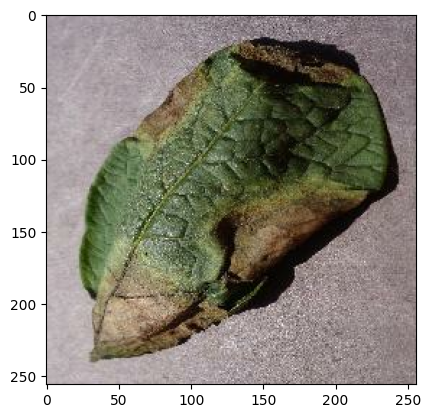

In [84]:
lst={}
for images_batch, labels_batch in test_ds.take(1):
    for i in range(len(image_batch)):
        first_image = images_batch[0].numpy().astype('uint8')
        plt.imshow(first_image)
        lst[i]=first_image